In [834]:
import numpy as np
import pandas as pd
pd.set_option('max_columns', 105)
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
%matplotlib inline
sns.set()

In [835]:
# setting the number of cross validations used in the Model part 
nr_cv = 5

# switch for using log values for SalePrice and features     
use_logvals = 1    
# target used for correlation 
target = 'Sold price'
    
# only columns with correlation above this threshold value  
# are used for the ML Regressors in Part 3
min_val_corr = 0.3   
    
# switch for dropping columns that are similar to others already used and show a high correlation to these     
drop_similar = 1

In [836]:
def get_best_score(grid):
    
    best_score = np.sqrt(-grid.best_score_)
    print(best_score)    
    print(grid.best_params_)
    print(grid.best_estimator_)
    
    return best_score

In [837]:
def print_cols_large_corr(df, nr_c, targ) :
    corr = df.corr()
    corr_abs = corr.abs()
    print (corr_abs.nlargest(nr_c, targ)[targ])

In [838]:
def plot_corr_matrix(df, nr_c, targ) :
    
    corr = df.corr()
    corr_abs = corr.abs()
    cols = corr_abs.nlargest(nr_c, targ)[targ].index
    cm = np.corrcoef(df[cols].values.T)

    plt.figure(figsize=(nr_c/1.5, nr_c/1.5))
    sns.set(font_scale=1.25)
    sns.heatmap(cm, linewidths=1.5, annot=True, square=True, 
                fmt='.2f', annot_kws={'size': 10}, 
                yticklabels=cols.values, xticklabels=cols.values
               )
    plt.show()

In [839]:
#load data
data = pd.read_csv('Combined_data.csv')

c:\Python\Python37\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (21) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [840]:
data.shape

(248874, 22)

In [841]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248874 entries, 0 to 248873
Data columns (total 22 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   ID                           248874 non-null  int64  
 1   Full Address                 248874 non-null  object 
 2   Suburb                       248815 non-null  object 
 3   TA Name                      248874 non-null  object 
 4   Region Name                  248874 non-null  object 
 5   IDC_Category                 248874 non-null  object 
 6   Property  Major Description  248874 non-null  object 
 7   Property  Minor description  248874 non-null  object 
 8   Floor area                   248829 non-null  float64
 9   Land area                    197556 non-null  float64
 10  Mapping Latitude             248874 non-null  float64
 11  Mapping Longitude            248874 non-null  float64
 12  Unconditional date           248874 non-null  object 
 13 

In [842]:
data.head()

ID                                       Full Address       Suburb  \
0  22096347  78 PapakuraClevedon Road, Clevedon, Papakura, ...     Clevedon   
1  22028100                       9 Neeves Road, Kaiapoi, 7691      Kaiapoi   
2  21841043        54 Ross Street, Kilbirnie, Wellington, 6022    Kilbirnie   
3  21960562          288 Remuera Road, Remuera, Auckland, 1050      Remuera   
4  22149587       37 Seymour Road, Mellons Bay, Auckland, 2014  Mellons Bay   

                TA Name        Region Name IDC_Category  \
0     Auckland  Manukau    Auckland Region  Residential   
1  Waimakariri District  Canterbury Region  Residential   
2       Wellington City  Wellington Region  Residential   
3        Auckland  City    Auckland Region  Residential   
4     Auckland  Manukau    Auckland Region  Residential   

  Property  Major Description Property  Minor description  Floor area  \
0                 Residential                    Dwelling       110.0   
1                 Residential                    Dwelling       170.0   
2                 Residential                    Dwelling       110.0   
3                 Residential                    Dwelling       979.0   
4                 Residential                    Dwelling      1422.0   

   Land area  Mapping Latitude  Mapping Longitude Unconditional date    CY  \
0      991.0         37.003080         175.035945         12/08/2021  2021   
1     2307.0         43.402387         172.644184          2/12/2021  2021   
2      306.0         41.321451         174.797270         29/09/2020  2020   
3     4188.0         36.879330         174.795196          1/11/2021  2021   
4     5752.0         36.886127         174.934498          8/03/2022  2022   

   Sold price  Bedrooms  Bathrooms  NoOfCarParks  MainRoofGarage  \
0    70000000       2.0        1.0           1.0             1.0   
1    40500000       4.0        1.0           3.0             NaN   
2    35000000       2.0        1.0           0.0             NaN   
3    29000000       4.0        1.0           4.0             4.0   
4    26300000       5.0        4.0          10.0            10.0   

   FreeStandingGarage  YearBuilt        ZoneDescription  
0                 NaN     1922.0     Residential Zone A  
1                 2.0     1925.0  Rural Industry Zone A  
2                 NaN     1920.0     Residential Zone A  
3                 NaN     2002.0     Residential Zone D  
4                 NaN     2015.0     Residential Zone A

In [843]:
data.describe()

ID     Floor area      Land area  Mapping Latitude  \
count  2.488740e+05  248829.000000  197556.000000     248874.000000   
mean   2.176415e+07     150.664492     796.743116         39.606583   
std    2.197157e+05      72.137685     986.613683          3.225568   
min    2.136536e+07      10.000000      13.000000          0.000000   
25%    2.158023e+07     100.000000     478.000000         36.903657   
50%    2.176558e+07     135.000000     658.000000         38.170469   
75%    2.195221e+07     190.000000     850.000000         41.382771   
max    2.215403e+07    7201.000000  225576.000000         46.906131   

       Mapping Longitude             CY    Sold price       Bedrooms  \
count      248874.000000  248874.000000  2.488740e+05  167114.000000   
mean          174.078063    2020.367077  8.639438e+05       3.126465   
std             4.900805       1.055475  7.305271e+05       0.901248   
min             0.000000    2019.000000  5.000000e+01       0.000000   
25%           173.197088    2019.000000  4.800000e+05       3.000000   
50%           174.761872    2020.000000  7.100000e+05       3.000000   
75%           175.086029    2021.000000  1.020000e+06       4.000000   
max           178.330413    2022.000000  7.000000e+07      16.000000   

           Bathrooms   NoOfCarParks  MainRoofGarage  FreeStandingGarage  \
count  167865.000000  167858.000000    87012.000000        70847.000000   
mean        1.595467       1.319848        1.707052            1.513430   
std         0.784326       1.014684        1.294774            0.902973   
min         0.000000       0.000000        1.000000            1.000000   
25%         1.000000       1.000000        1.000000            1.000000   
50%         1.000000       1.000000        2.000000            1.000000   
75%         2.000000       2.000000        2.000000            2.000000   
max        18.000000     100.000000      223.000000           56.000000   

           YearBuilt  
count  167871.000000  
mean     1981.687981  
std        30.981827  
min      1842.000000  
25%      1961.000000  
50%      1985.000000  
75%      2007.000000  
max      2023.000000

In [844]:
df_train = data.loc[ 
                    (data['Sold price'] != 0) &
                    (data['Sold price'] <2000000) &
                    (data['Land area'] <=8000) &
                    (data['Floor area'] <=600)
                     ]

In [845]:
df_train.head()

ID                                       Full Address     Suburb  \
5   21905599    23 Camelia Place, Islington, Christchurch, 8042  Islington   
8   21668331  11A Dillons Point Road, Islington, Blenheim, 7201  Islington   
10  22097455  11A Dillons Point Road, Islington, Blenheim, 7201  Islington   
12  21944925  33C Dillons Point Road, Islington, Blenheim, 7201  Islington   
16  21823853                      4 Tawanui Road, Kaikohe, 0405    Kaikohe   

                 TA Name                Region Name IDC_Category  \
5      Christchurch City          Canterbury Region  Residential   
8   Marlborough District  Tasman Nelson Marlborough  Residential   
10  Marlborough District  Tasman Nelson Marlborough  Residential   
12  Marlborough District  Tasman Nelson Marlborough  Residential   
16    Far North District           Northland Region  Residential   

   Property  Major Description Property  Minor description  Floor area  \
5                  Residential                    Dwelling       102.0   
8                  Residential                    Dwelling       151.0   
10                 Residential                    Dwelling       151.0   
12                 Residential                    Dwelling       115.0   
16                 Residential                    Dwelling       100.0   

    Land area  Mapping Latitude  Mapping Longitude Unconditional date    CY  \
5       602.0         43.545167         172.509608         19/08/2021  2021   
8      2921.0         41.508157         173.963575          9/08/2020  2020   
10     2921.0         41.508157         173.963575          6/10/2022  2022   
12     1367.0         41.509723         173.966595         21/10/2021  2021   
16     1057.0         35.403890         173.793721         24/03/2021  2021   

    Sold price  Bedrooms  Bathrooms  NoOfCarParks  MainRoofGarage  \
5       600000       3.0        1.0           2.0             NaN   
8       540000       3.0        2.0           3.0             NaN   
10      850000       3.0        2.0           3.0             NaN   
12      660000       3.0        1.0           2.0             NaN   
16      275000       3.0        1.0           1.0             NaN   

    FreeStandingGarage  YearBuilt                   ZoneDescription  
5                  2.0     1960.0                Residential Zone A  
8                  3.0     1978.0  Multi-use or Reserve Land Zone X  
10                 3.0     1978.0  Multi-use or Reserve Land Zone X  
12                 2.0     1978.0                Residential Zone B  
16                 1.0     1961.0                Residential Zone A

In [846]:
df_train.shape

(186576, 22)

In [847]:
df_train.columns

Index(['ID', 'Full Address', 'Suburb', 'TA Name', 'Region Name',
       'IDC_Category', 'Property  Major Description',
       'Property  Minor description', 'Floor area', 'Land area',
       'Mapping Latitude', 'Mapping Longitude', 'Unconditional date', 'CY',
       'Sold price', 'Bedrooms', 'Bathrooms', 'NoOfCarParks', 'MainRoofGarage',
       'FreeStandingGarage', 'YearBuilt', 'ZoneDescription'],
      dtype='object')

In [848]:
cols_to_drop = ['ID','Full Address','Mapping Latitude', 'Mapping Longitude']

In [849]:
for df in [df_train]:
    df.drop(cols_to_drop, inplace=True, axis =1)

c:\Python\Python37\lib\site-packages\pandas\core\frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [850]:
df_train.describe()

Floor area      Land area             CY    Sold price  \
count  186576.000000  186576.000000  186576.000000  1.865760e+05   
mean      156.786130     763.089652    2020.338270  7.775859e+05   
std        63.754415     653.460531       1.056435  4.004779e+05   
min        10.000000      13.000000    2019.000000  2.814000e+03   
25%       109.000000     475.000000    2019.000000  4.800000e+05   
50%       146.000000     655.000000    2020.000000  7.100000e+05   
75%       195.000000     840.000000    2021.000000  9.925000e+05   
max       598.000000    8000.000000    2022.000000  1.998000e+06   

            Bedrooms      Bathrooms   NoOfCarParks  MainRoofGarage  \
count  123100.000000  123712.000000  123708.000000    66364.000000   
mean        3.255475       1.642646       1.381228        1.748358   
std         0.824006       0.772026       1.032810        1.038487   
min         0.000000       0.000000       0.000000        1.000000   
25%         3.000000       1.000000       1.000000        1.000000   
50%         3.000000       2.000000       1.000000        2.000000   
75%         4.000000       2.000000       2.000000        2.000000   
max        16.000000      15.000000     100.000000      223.000000   

       FreeStandingGarage      YearBuilt  
count        53185.000000  123719.000000  
mean             1.587929    1981.950194  
std              0.760272      32.278847  
min              1.000000    1842.000000  
25%              1.000000    1960.000000  
50%              1.000000    1985.000000  
75%              2.000000    2012.000000  
max             56.000000    2023.000000

c:\Python\Python37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Skewness: 0.748099
Kurtosis: 0.094966


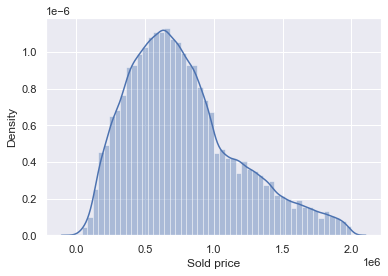

In [851]:
sns.distplot(df_train['Sold price'])
print("Skewness: %f" % df_train['Sold price'].skew())
print("Kurtosis: %f" % df_train['Sold price'].kurt())

In [852]:
df_train['Saleprice_log'] = np.log(df_train['Sold price'])

c:\Python\Python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


c:\Python\Python37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Skewness: -0.678755
Kurtosis: 0.895563


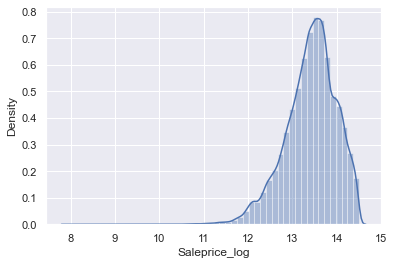

In [853]:
sns.distplot(df_train['Saleprice_log'])
print("Skewness: %f" % df_train['Saleprice_log'].skew())
print("Kurtosis: %f" % df_train['Saleprice_log'].kurt())
# continue to use the original sale price

In [854]:
df_train.drop('Saleprice_log', axis=1, inplace=True)

c:\Python\Python37\lib\site-packages\pandas\core\frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [855]:
numerical_feats = df_train.dtypes[df_train.dtypes != "object"].index
print("Number of Numerical features: ", len(numerical_feats))

Number of Numerical features:  10


In [856]:
categorical_feats = df_train.dtypes[df_train.dtypes == "object"].index
print("Number of Categorical features: ", len(categorical_feats))

Number of Categorical features:  8


In [857]:
print(df_train[numerical_feats].columns)
print("*"*100)
print(df_train[categorical_feats].columns)

Index(['Floor area', 'Land area', 'CY', 'Sold price', 'Bedrooms', 'Bathrooms',
       'NoOfCarParks', 'MainRoofGarage', 'FreeStandingGarage', 'YearBuilt'],
      dtype='object')
****************************************************************************************************
Index(['Suburb', 'TA Name', 'Region Name', 'IDC_Category',
       'Property  Major Description', 'Property  Minor description',
       'Unconditional date', 'ZoneDescription'],
      dtype='object')


In [858]:
df_train[numerical_feats].head()

Floor area  Land area    CY  Sold price  Bedrooms  Bathrooms  \
5        102.0      602.0  2021      600000       3.0        1.0   
8        151.0     2921.0  2020      540000       3.0        2.0   
10       151.0     2921.0  2022      850000       3.0        2.0   
12       115.0     1367.0  2021      660000       3.0        1.0   
16       100.0     1057.0  2021      275000       3.0        1.0   

    NoOfCarParks  MainRoofGarage  FreeStandingGarage  YearBuilt  
5            2.0             NaN                 2.0     1960.0  
8            3.0             NaN                 3.0     1978.0  
10           3.0             NaN                 3.0     1978.0  
12           2.0             NaN                 2.0     1978.0  
16           1.0             NaN                 1.0     1961.0

In [859]:
df_train[categorical_feats].head()

Suburb               TA Name                Region Name IDC_Category  \
5   Islington     Christchurch City          Canterbury Region  Residential   
8   Islington  Marlborough District  Tasman Nelson Marlborough  Residential   
10  Islington  Marlborough District  Tasman Nelson Marlborough  Residential   
12  Islington  Marlborough District  Tasman Nelson Marlborough  Residential   
16    Kaikohe    Far North District           Northland Region  Residential   

   Property  Major Description Property  Minor description Unconditional date  \
5                  Residential                    Dwelling         19/08/2021   
8                  Residential                    Dwelling          9/08/2020   
10                 Residential                    Dwelling          6/10/2022   
12                 Residential                    Dwelling         21/10/2021   
16                 Residential                    Dwelling         24/03/2021   

                     ZoneDescription  
5                 Residential Zone A  
8   Multi-use or Reserve Land Zone X  
10  Multi-use or Reserve Land Zone X  
12                Residential Zone B  
16                Residential Zone A

In [860]:
#List of featuers with missing values
total = df_train.isnull().sum().sort_values(ascending=False)
percent = (df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

Total   Percent
FreeStandingGarage           133391  0.714942
MainRoofGarage               120212  0.644306
Bedrooms                      63476  0.340215
ZoneDescription               62869  0.336962
NoOfCarParks                  62868  0.336957
Bathrooms                     62864  0.336935
YearBuilt                     62857  0.336898
Suburb                           36  0.000193
Unconditional date                0  0.000000
TA Name                           0  0.000000
Sold price                        0  0.000000
Land area                         0  0.000000
Floor area                        0  0.000000
Property  Minor description       0  0.000000
Property  Major Description       0  0.000000
IDC_Category                      0  0.000000
Region Name                       0  0.000000
CY                                0  0.000000

In [861]:
# filling missing values
# columns where NaN values have meanings 
cols_fillna = ['ZoneDescription','Suburb']

In [862]:
#replace NaN with None in thes columns 
for col in cols_fillna:
    df_train[col].fillna('None', inplace=True)

c:\Python\Python37\lib\site-packages\pandas\core\generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [863]:
total = df_train.isnull().sum().sort_values(ascending=False)
percent = (df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data

Total   Percent
FreeStandingGarage           133391  0.714942
MainRoofGarage               120212  0.644306
Bedrooms                      63476  0.340215
NoOfCarParks                  62868  0.336957
Bathrooms                     62864  0.336935
YearBuilt                     62857  0.336898
Suburb                            0  0.000000
TA Name                           0  0.000000
Sold price                        0  0.000000
CY                                0  0.000000
Unconditional date                0  0.000000
Land area                         0  0.000000
Floor area                        0  0.000000
Property  Minor description       0  0.000000
Property  Major Description       0  0.000000
IDC_Category                      0  0.000000
Region Name                       0  0.000000
ZoneDescription                   0  0.000000

In [864]:
missing_data_to_drop = ['MainRoofGarage']

In [865]:
for df in [df_train]:
    df.drop(missing_data_to_drop, inplace=True, axis=1)

c:\Python\Python37\lib\site-packages\pandas\core\frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [866]:
df_train.head()

Suburb               TA Name                Region Name IDC_Category  \
5   Islington     Christchurch City          Canterbury Region  Residential   
8   Islington  Marlborough District  Tasman Nelson Marlborough  Residential   
10  Islington  Marlborough District  Tasman Nelson Marlborough  Residential   
12  Islington  Marlborough District  Tasman Nelson Marlborough  Residential   
16    Kaikohe    Far North District           Northland Region  Residential   

   Property  Major Description Property  Minor description  Floor area  \
5                  Residential                    Dwelling       102.0   
8                  Residential                    Dwelling       151.0   
10                 Residential                    Dwelling       151.0   
12                 Residential                    Dwelling       115.0   
16                 Residential                    Dwelling       100.0   

    Land area Unconditional date    CY  Sold price  Bedrooms  Bathrooms  \
5       602.0         19/08/2021  2021      600000       3.0        1.0   
8      2921.0          9/08/2020  2020      540000       3.0        2.0   
10     2921.0          6/10/2022  2022      850000       3.0        2.0   
12     1367.0         21/10/2021  2021      660000       3.0        1.0   
16     1057.0         24/03/2021  2021      275000       3.0        1.0   

    NoOfCarParks  FreeStandingGarage  YearBuilt  \
5            2.0                 2.0     1960.0   
8            3.0                 3.0     1978.0   
10           3.0                 3.0     1978.0   
12           2.0                 2.0     1978.0   
16           1.0                 1.0     1961.0   

                     ZoneDescription  
5                 Residential Zone A  
8   Multi-use or Reserve Land Zone X  
10  Multi-use or Reserve Land Zone X  
12                Residential Zone B  
16                Residential Zone A

In [867]:
total = df_train.isnull().sum().sort_values(ascending=False)
percent = (df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(10)

Total   Percent
FreeStandingGarage  133391  0.714942
Bedrooms             63476  0.340215
NoOfCarParks         62868  0.336957
Bathrooms            62864  0.336935
YearBuilt            62857  0.336898
Suburb                   0  0.000000
CY                       0  0.000000
Sold price               0  0.000000
Unconditional date       0  0.000000
TA Name                  0  0.000000

In [868]:
cols_fill_zero = ['FreeStandingGarage','Bedrooms','NoOfCarParks','Bathrooms']

In [869]:
for col in cols_fill_zero:
    df_train[col].fillna(0, inplace=True)

c:\Python\Python37\lib\site-packages\pandas\core\generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [870]:
total = df_train.isnull().sum().sort_values(ascending=False)
percent = (df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(5)

Total   Percent
YearBuilt           62857  0.336898
Suburb                  0  0.000000
CY                      0  0.000000
FreeStandingGarage      0  0.000000
NoOfCarParks            0  0.000000

In [871]:
col_fill_mean = missing_data[missing_data['Total'] > 1].index

In [872]:
col_fill_mean

Index(['YearBuilt'], dtype='object')

In [873]:
# col_fill_mean_v2 = ['CL_LandArea', 'CL_YearBuilt', 'CL_FloorArea']

In [874]:
for col in col_fill_mean:
    df_train.fillna(df_train[col].mean(),inplace=True)

c:\Python\Python37\lib\site-packages\pandas\core\frame.py:5182: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [875]:
total = df_train.isnull().sum().sort_values(ascending=False)
percent = (df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(5)

Total  Percent
Suburb                  0      0.0
CY                      0      0.0
YearBuilt               0      0.0
FreeStandingGarage      0      0.0
NoOfCarParks            0      0.0

In [876]:
# df_train = df_train.dropna()

In [877]:
# df_train.head()

In [878]:
df_train.isnull().sum().sum()

0

In [879]:
# df_train.columns

In [880]:
df_train.shape

(186576, 17)

In [881]:
#Log transformation
for col in numerical_feats:
    try:
        print('{:15}'.format(col), 
            'Skewness: {:05.2f}'.format(df_train[col].skew()) , 
            '   ' ,
            'Kurtosis: {:06.2f}'.format(df_train[col].kurt())  
            )
    except: 
        print('N/A')

Floor area      Skewness: 00.96     Kurtosis: 001.33
Land area       Skewness: 04.81     Kurtosis: 032.60
CY              Skewness: 00.19     Kurtosis: -01.19
Sold price      Skewness: 00.75     Kurtosis: 000.09
Bedrooms        Skewness: -0.18     Kurtosis: -01.27
Bathrooms       Skewness: 00.82     Kurtosis: 001.36
NoOfCarParks    Skewness: 06.78     Kurtosis: 447.27
N/A
FreeStandingGarage Skewness: 03.64     Kurtosis: 117.76
YearBuilt       Skewness: -0.68     Kurtosis: 000.74


c:\Python\Python37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Skewness: 0.960481
Kurtosis: 1.334213


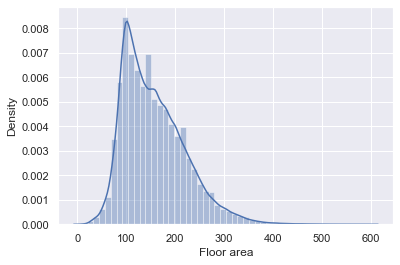

In [882]:
sns.distplot(df_train['Floor area']);
#skewness and kurtosis
print("Skewness: %f" % df_train['Floor area'].skew())
print("Kurtosis: %f" % df_train['Floor area'].kurt())

In [883]:
# df_train['FloorArea_log'] = np.log(df_train['CL_FloorArea'])

In [884]:
# sns.distplot(df_train['FloorArea_log'])
# print("Skewness: %f" % df_train['FloorArea_log'].skew())
# print("Kurtosis: %f" % df_train['FloorArea_log'].kurt())

In [885]:
# df_train.drop('FloorArea_log',inplace=True,axis=1)

c:\Python\Python37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Skewness: 4.814032
Kurtosis: 32.595779


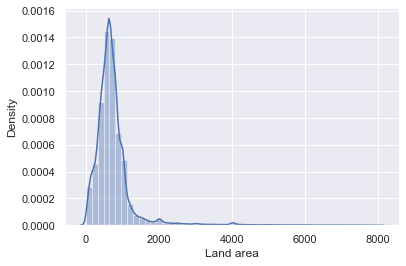

In [886]:
sns.distplot(df_train['Land area']);
#skewness and kurtosis
print("Skewness: %f" % df_train['Land area'].skew())
print("Kurtosis: %f" % df_train['Land area'].kurt())

In [887]:
df_train = df_train.loc[df_train['Land area'] <= 2000]

c:\Python\Python37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Skewness: 0.782916
Kurtosis: 1.705375


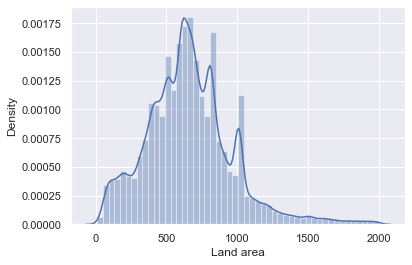

In [888]:
sns.distplot(df_train['Land area']);
#skewness and kurtosis
print("Skewness: %f" % df_train['Land area'].skew())
print("Kurtosis: %f" % df_train['Land area'].kurt())

In [889]:
# df_train['LandArea_log'] = np.log(df_train['CL_LandArea'])

In [890]:
# sns.distplot(df_train['LandArea_log'])
# print("Skewness: %f" % df_train['LandArea_log'].skew())
# print("Kurtosis: %f" % df_train['LandArea_log'].kurt())

In [891]:
# df_train.drop('CL_LandArea',inplace=True,axis=1)

In [892]:
df_train.shape

(179753, 17)

In [893]:
#relationship of features to target
numerical_feats = df_train.dtypes[df_train.dtypes != "object"].index
print("Number of Numerical features: ", len(numerical_feats))

Number of Numerical features:  9


In [894]:
numerical_feats

Index(['Floor area', 'Land area', 'CY', 'Sold price', 'Bedrooms', 'Bathrooms',
       'NoOfCarParks', 'FreeStandingGarage', 'YearBuilt'],
      dtype='object')

In [895]:
li_num_feats = list(numerical_feats)
li_not_plot = ['Sold price']


li_plot_num_feats = [c for c in list(numerical_feats) if c not in li_not_plot]
# li_plot_num_feats = ['CL_Bedrooms', 'CL_Bathrooms', 'CL_NoOfCarParks', 'CL_YearBuilt','FloorArea_log','LandArea_log','CL_LandArea','CL_FloorArea']


c:\Python\Python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
c:\Python\Python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
c:\Python\Python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
c:\Python\Python37\lib\site-packages\seabor

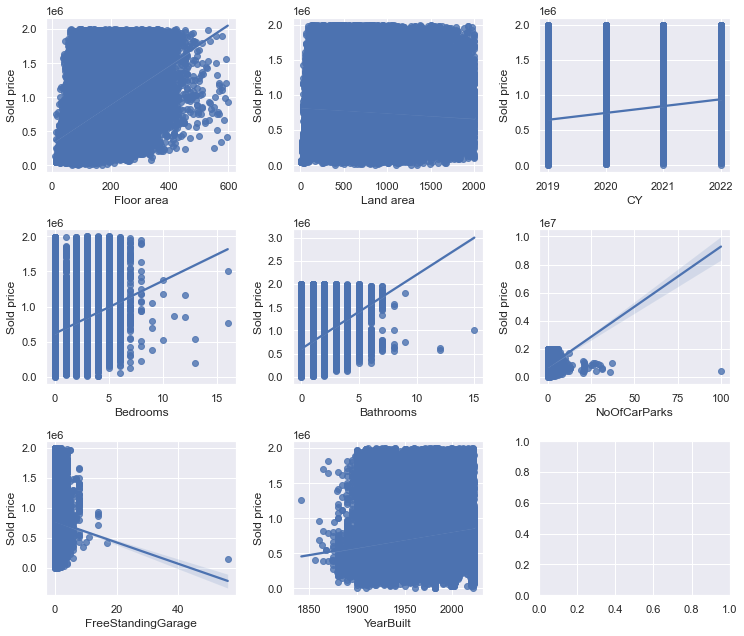

In [896]:
nr_rows = 3
nr_cols = 3

fig, axs = plt.subplots(nr_rows, nr_cols, figsize=(nr_cols*3.5,nr_rows*3))
# tips = sns.load_dataset('tips')

for r in range(0,nr_rows):
    for c in range(0,nr_cols):  
        i = r*nr_cols+c
        if i < len(li_plot_num_feats):
            sns.regplot(df_train[li_plot_num_feats[i]], df_train[target], ax = axs[r][c])
           # stp = stats.pearsonr(df_train[li_plot_num_feats[i]], df_train[target])
            # axs[r][c].text(0.4,0.9,"title",fontsize=7)
            # str_title = "r = " + "{0:.2f}".format(stp[0]) + "      " "p = " + "{0:.2f}".format(stp[1])
            # axs[r][c].set_title(str_title,fontsize=11)
            
plt.tight_layout()    
plt.show()   

In [897]:
#outliers
df_train = df_train.drop(df_train[(df_train['Bedrooms']>=10) | 
                                  (df_train['Bathrooms']>=10) | 
                                  (df_train['NoOfCarParks']>=10) |
                                  (df_train['FreeStandingGarage']>=20)].index)

c:\Python\Python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
c:\Python\Python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
c:\Python\Python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
c:\Python\Python37\lib\site-packages\seabor

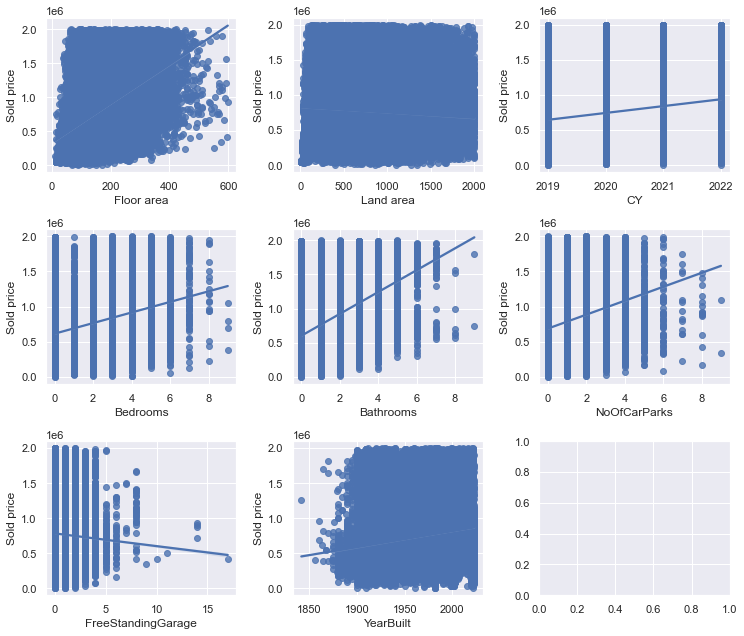

In [898]:
nr_rows = 3
nr_cols = 3

fig, axs = plt.subplots(nr_rows, nr_cols, figsize=(nr_cols*3.5,nr_rows*3))
# tips = sns.load_dataset('tips')

for r in range(0,nr_rows):
    for c in range(0,nr_cols):  
        i = r*nr_cols+c
        if i < len(li_plot_num_feats):
            sns.regplot(df_train[li_plot_num_feats[i]], df_train[target], ax = axs[r][c])
           # stp = stats.pearsonr(df_train[li_plot_num_feats[i]], df_train[target])
            # axs[r][c].text(0.4,0.9,"title",fontsize=7)
            # str_title = "r = " + "{0:.2f}".format(stp[0]) + "      " "p = " + "{0:.2f}".format(stp[1])
            # axs[r][c].set_title(str_title,fontsize=11)
            
plt.tight_layout()    
plt.show()   

In [899]:
#Find columns with strong correlation to target
corr = df_train.corr()
corr_abs = corr.abs()

nr_num_cols = len(numerical_feats)
ser_corr = corr_abs.nlargest(nr_num_cols, target)[target]

cols_abv_corr_limit = list(ser_corr[ser_corr.values > min_val_corr].index)
cols_bel_corr_limit = list(ser_corr[ser_corr.values <= min_val_corr].index)

In [900]:
#List of numerical features and their correlation coefficient to target
print(ser_corr)
print("*"*30)
print("List of numerical features with r above min_val_corr :")
print(cols_abv_corr_limit)
print("*"*30)
print("List of numerical features with r below min_val_corr :")
print(cols_bel_corr_limit)

Sold price            1.000000
Floor area            0.450421
Bathrooms             0.400389
Bedrooms              0.315862
CY                    0.258201
NoOfCarParks          0.242351
YearBuilt             0.150268
Land area             0.058330
FreeStandingGarage    0.036113
Name: Sold price, dtype: float64
******************************
List of numerical features with r above min_val_corr :
['Sold price', 'Floor area', 'Bathrooms', 'Bedrooms']
******************************
List of numerical features with r below min_val_corr :
['CY', 'NoOfCarParks', 'YearBuilt', 'Land area', 'FreeStandingGarage']


In [901]:
categorical_feats

Index(['Suburb', 'TA Name', 'Region Name', 'IDC_Category',
       'Property  Major Description', 'Property  Minor description',
       'Unconditional date', 'ZoneDescription'],
      dtype='object')

In [902]:
categorical_feats_v2 = ['Region Name',
       'Property  Minor description']

In [903]:
#List of categorical features and their unique values
for catg in list(categorical_feats_v2):
    print(df_train[catg].value_counts())
    print('#'*50)

Auckland Region              48904
Canterbury Region            29629
Waikato Region               19341
Wellington Region            17698
Bay of Plenty Region         12074
ManawatuWhanganui Region     10729
Otago Region                 10407
Tasman Nelson Marlborough     6150
Northland Region              6038
Hawke's Bay Region            5686
Southland Region              4974
Taranaki Region               4754
West Coast Region             1930
Gisborne Region               1381
Chathams                         4
Name: Region Name, dtype: int64
##################################################
Dwelling                  163524
Ownership home units       10589
Home & income               3147
Apartments                  1403
More than one dwelling      1036
Name: Property  Minor description, dtype: int64
##################################################


In [904]:
# li_cat_feats = list(categorical_feats_v2)
# nr_rows = 3
# nr_cols = 3

# fig, axs = plt.subplots(nr_rows, nr_cols, figsize=(nr_cols*5,nr_rows*5))

# for r in range(0,nr_rows):
#     for c in range(0,nr_cols):  
#         i = r*nr_cols+c
#         if i < len(li_cat_feats):
#             sns.boxplot(x=li_cat_feats[i], y=target, data=df_train, ax = axs[r][c])
    
# plt.tight_layout()    
# plt.show()  

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 [Text(0, 0, 'Canterbury Region'),
  Text(1, 0, 'Tasman Nelson Marlborough'),
  Text(2, 0, 'Northland Region'),
  Text(3, 0, 'Auckland Region'),
  Text(4, 0, 'West Coast Region'),
  Text(5, 0, 'Otago Region'),
  Text(6, 0, 'Taranaki Region'),
  Text(7, 0, 'Bay of Plenty Region'),
  Text(8, 0, 'Wellington Region'),
  Text(9, 0, "Hawke's Bay Region"),
  Text(10, 0, 'Waikato Region'),
  Text(11, 0, 'ManawatuWhanganui Region'),
  Text(12, 0, 'Southland Region'),
  Text(13, 0, 'Gisborne Region'),
  Text(14, 0, 'Chathams')])

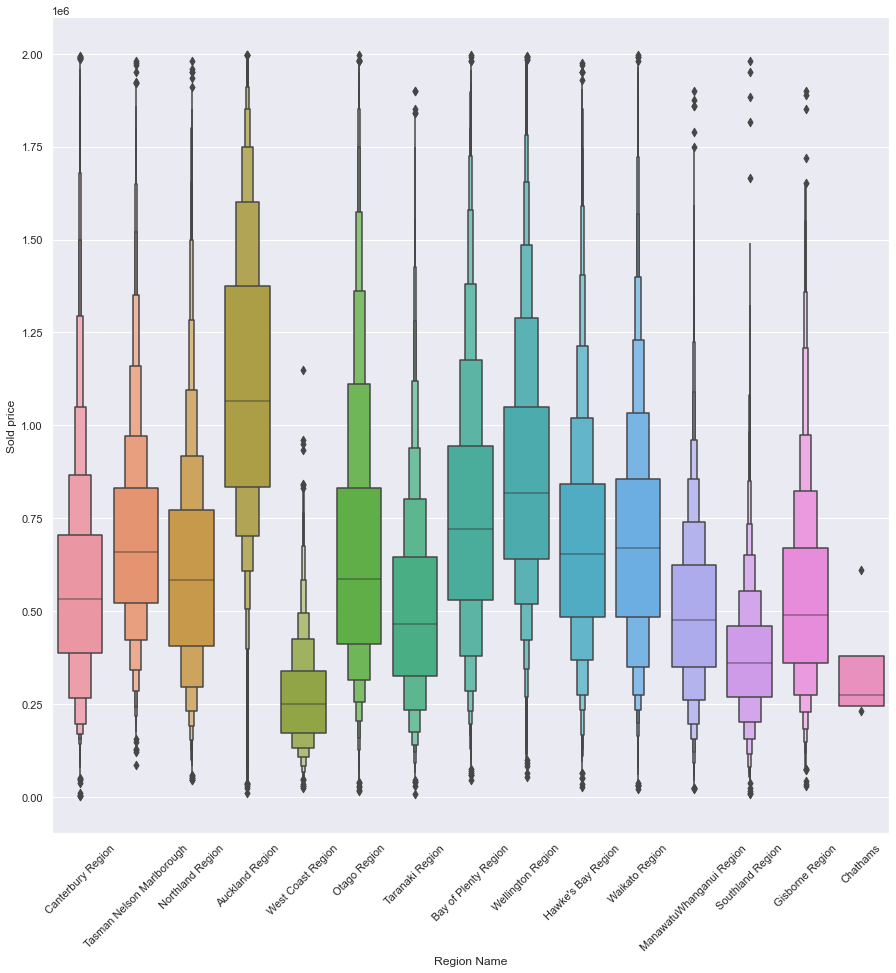

In [905]:
plt.figure(figsize=(15,15))
sns.boxenplot(x=df_train['Region Name'], y = df_train[target])
plt.xticks(rotation=45)

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Dwelling'),
  Text(1, 0, 'Home & income'),
  Text(2, 0, 'More than one dwelling'),
  Text(3, 0, 'Ownership home units'),
  Text(4, 0, 'Apartments')])

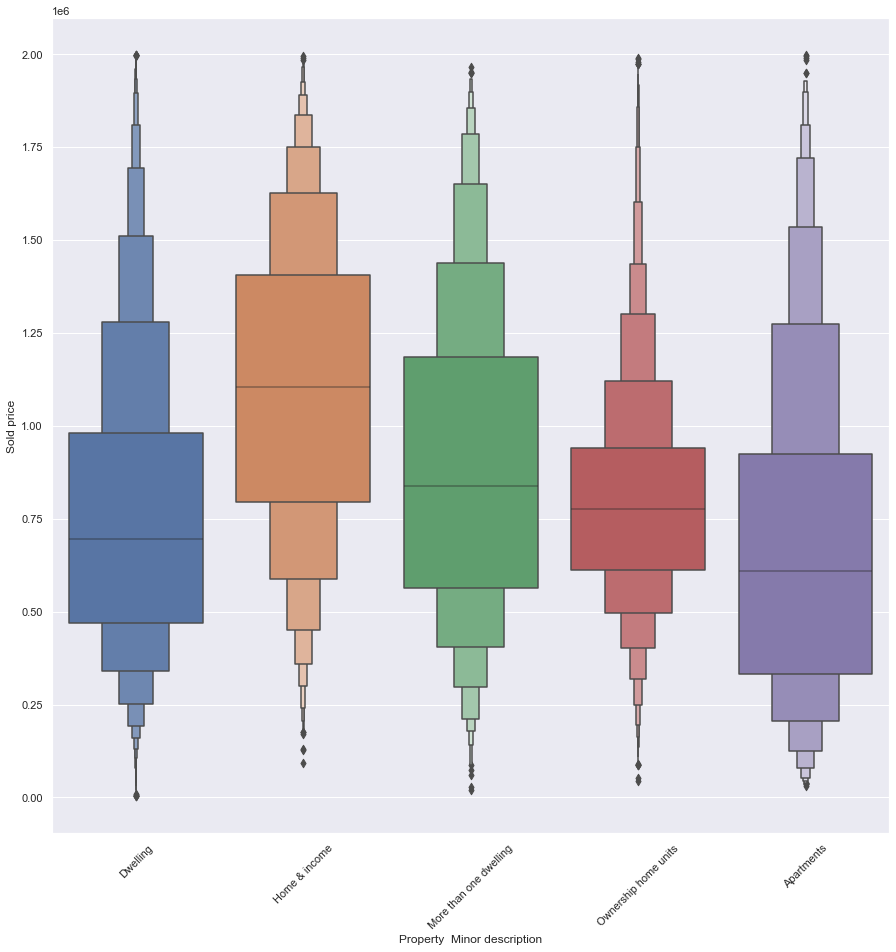

In [906]:
plt.figure(figsize=(15,15))
sns.boxenplot(x=df_train['Property  Minor description'], y = df_train[target])
plt.xticks(rotation=45)

In [907]:
catg_strong_corr = ['Region Name',
       'Property  Minor description']

catg_weak_corr = ['Suburb', 'TA Name', 'IDC_Category',
       'Property  Major Description',
       'Unconditional date', 'ZoneDescription']

In [908]:
# plot_corr_matrix(df_train, 20,target)

In [909]:
_num  = cols_abv_corr_limit
_catg = catg_strong_corr

In [910]:
cols_to_keep = cols_abv_corr_limit + catg_strong_corr

In [911]:
cols_to_keep

['Sold price',
 'Floor area',
 'Bathrooms',
 'Bedrooms',
 'Region Name',
 'Property  Minor description']

In [912]:
all_cols = list(df_train.columns)

In [913]:
all_cols

['Suburb',
 'TA Name',
 'Region Name',
 'IDC_Category',
 'Property  Major Description',
 'Property  Minor description',
 'Floor area',
 'Land area',
 'Unconditional date',
 'CY',
 'Sold price',
 'Bedrooms',
 'Bathrooms',
 'NoOfCarParks',
 'FreeStandingGarage',
 'YearBuilt',
 'ZoneDescription']

In [914]:
cols_to_drop = set(all_cols) - set(cols_to_keep)

In [915]:
for df in [df_train]:
    df.drop(cols_to_drop, inplace= True, axis = 1)

In [916]:
df_train.head()

Region Name Property  Minor description  Floor area  \
5           Canterbury Region                    Dwelling       102.0   
12  Tasman Nelson Marlborough                    Dwelling       115.0   
16           Northland Region                    Dwelling       100.0   
21           Northland Region                    Dwelling       220.0   
22           Northland Region                    Dwelling       114.0   

    Sold price  Bedrooms  Bathrooms  
5       600000       3.0        1.0  
12      660000       3.0        1.0  
16      275000       3.0        1.0  
21      439000       3.0        1.0  
22      248000       4.0        2.0

In [917]:
#Convert categorical columns to numerical
catg_list = catg_strong_corr.copy()

In [918]:
catg_list

['Region Name', 'Property  Minor description']

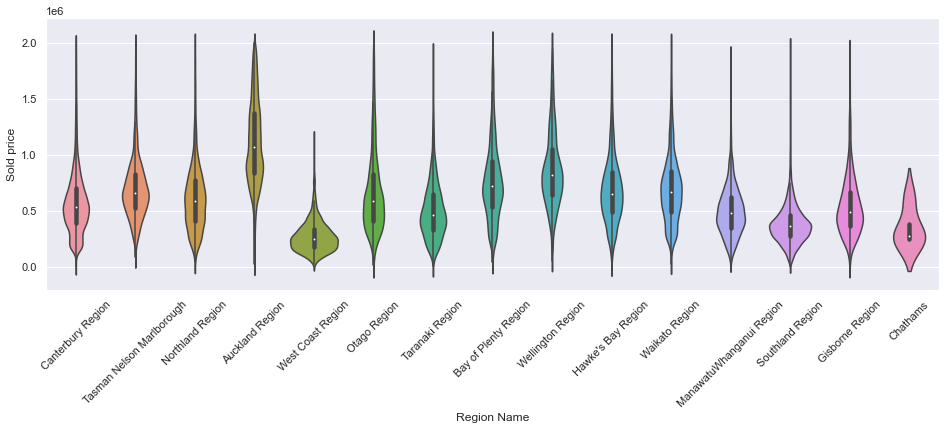

In [919]:
fig, ax = plt.subplots()
fig.set_size_inches(16, 5)
sns.violinplot(x='Region Name', y=target, data=df_train, ax=ax)
plt.xticks(rotation=45)
plt.show()

In [920]:
for catg in catg_list :
    g = df_train.groupby(catg)[target].mean()
    print(g)

Region Name
Auckland Region              1.110475e+06
Bay of Plenty Region         7.651113e+05
Canterbury Region            5.745725e+05
Chathams                     3.477500e+05
Gisborne Region              5.438326e+05
Hawke's Bay Region           6.911426e+05
ManawatuWhanganui Region     4.992403e+05
Northland Region             6.146925e+05
Otago Region                 6.675115e+05
Southland Region             3.773549e+05
Taranaki Region              5.090590e+05
Tasman Nelson Marlborough    6.987175e+05
Waikato Region               6.980517e+05
Wellington Region            8.705601e+05
West Coast Region            2.712401e+05
Name: Sold price, dtype: float64
Property  Minor description
Apartments                6.880509e+05
Dwelling                  7.672707e+05
Home & income             1.101810e+06
More than one dwelling    8.904376e+05
Ownership home units      7.997902e+05
Name: Sold price, dtype: float64


In [921]:
# df_train = df_train.drop(df_train[(df_train['CL_PropertyTypeMinorDesc'] == 'Parking (likely residential use)') |
#                                   (df_train['CL_PropertyTypeMinorDesc'] =='Rental (dwelling converted to flats)') |
#                                   (df_train['CL_PropertyTypeMinorDesc'] == 'Rental flats (purpose built)') |
#                                   (df_train['CL_PropertyTypeMinorDesc'] =='Vacant') |
#                                   (df_train['CL_PropertyTypeMinorDesc'] =='Vacant land multiple housing')].index)

In [922]:
for catg in list(categorical_feats_v2):
    print(df_train[catg].value_counts())
    print('#'*50)

Auckland Region              48904
Canterbury Region            29629
Waikato Region               19341
Wellington Region            17698
Bay of Plenty Region         12074
ManawatuWhanganui Region     10729
Otago Region                 10407
Tasman Nelson Marlborough     6150
Northland Region              6038
Hawke's Bay Region            5686
Southland Region              4974
Taranaki Region               4754
West Coast Region             1930
Gisborne Region               1381
Chathams                         4
Name: Region Name, dtype: int64
##################################################
Dwelling                  163524
Ownership home units       10589
Home & income               3147
Apartments                  1403
More than one dwelling      1036
Name: Property  Minor description, dtype: int64
##################################################


In [923]:
df_train = df_train.drop(df_train[(df_train['Region Name'] == 'Chathams') ].index)

In [924]:
for catg in list(categorical_feats_v2):
    print(df_train[catg].value_counts())
    print('#'*50)

Auckland Region              48904
Canterbury Region            29629
Waikato Region               19341
Wellington Region            17698
Bay of Plenty Region         12074
ManawatuWhanganui Region     10729
Otago Region                 10407
Tasman Nelson Marlborough     6150
Northland Region              6038
Hawke's Bay Region            5686
Southland Region              4974
Taranaki Region               4754
West Coast Region             1930
Gisborne Region               1381
Name: Region Name, dtype: int64
##################################################
Dwelling                  163520
Ownership home units       10589
Home & income               3147
Apartments                  1403
More than one dwelling      1036
Name: Property  Minor description, dtype: int64
##################################################


In [925]:
df_train['Region Name'].unique()

array(['Canterbury Region', 'Tasman Nelson Marlborough',
       'Northland Region', 'Auckland Region', 'West Coast Region',
       'Otago Region', 'Taranaki Region', 'Bay of Plenty Region',
       'Wellington Region', "Hawke's Bay Region", 'Waikato Region',
       'ManawatuWhanganui Region', 'Southland Region', 'Gisborne Region'],
      dtype=object)

In [926]:
# region_catg1 = ['Auckland (Unitary)']
# region_catg2 = ["Canterbury Region", " Waikato Region", "Wellington Region","Bay of Plenty Region"]
# region_catg3 = ['Tasman Nelson Marlborough',
#        'Northland Region', 'West Coast Region',
#        'Ota Region', 'Taranaki Region', 'Hawkes Bay Region',
#        'Manawatu-Whanganui Region', 'Southland Region',
#        'Gisborne (Unitary)']

In [927]:
# df_train['CL_PropertyTypeMinorDesc'].unique()

In [928]:
# del df_train['CL_PropertyTypeMinorDesc']

In [929]:
# del df_train['CL_FloorArea']

In [930]:
# for df in [df_train]:
#     df_train['Region'] = "Auckland"
#     df.loc[(df_train['CL_RegionName'].isin(region_catg2)), 'Region'] = "Large city"
#     df.loc[(df_train['CL_RegionName'].isin(region_catg3)), 'Region'] = "Other"

In [931]:
df_train

Region Name Property  Minor description  Floor area  \
5               Canterbury Region                    Dwelling       102.0   
12      Tasman Nelson Marlborough                    Dwelling       115.0   
16               Northland Region                    Dwelling       100.0   
21               Northland Region                    Dwelling       220.0   
22               Northland Region                    Dwelling       114.0   
...                           ...                         ...         ...   
248868               Otago Region                    Dwelling        70.0   
248869            Auckland Region                    Dwelling        86.0   
248870           Southland Region                    Dwelling        70.0   
248872          Canterbury Region                    Dwelling       169.0   
248873          Canterbury Region                    Dwelling        90.0   

        Sold price  Bedrooms  Bathrooms  
5           600000       3.0        1.0  
12          660000       3.0        1.0  
16          275000       3.0        1.0  
21          439000       3.0        1.0  
22          248000       4.0        2.0  
...            ...       ...        ...  
248868       16770       0.0        0.0  
248869       11000       0.0        0.0  
248870        7500       0.0        0.0  
248872        3517       0.0        0.0  
248873        2814       0.0        0.0  

[179695 rows x 6 columns]

In [932]:
# del df_train['CL_RegionName']

In [933]:
df_train = pd.get_dummies(df_train)

In [934]:
df_train.shape

(179695, 23)

In [935]:
# df_train

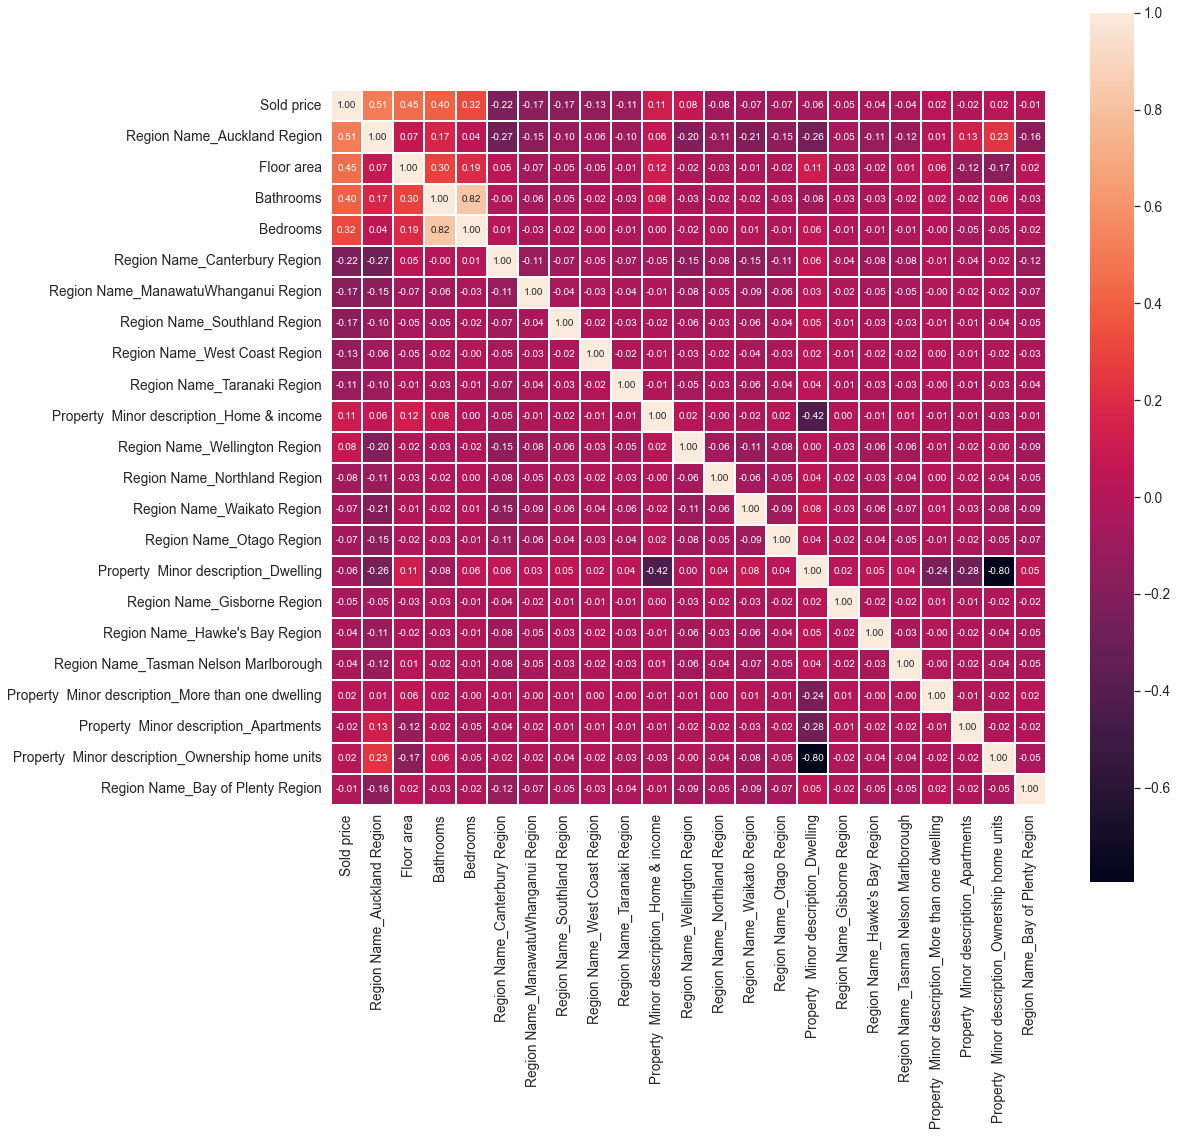

In [936]:
plot_corr_matrix(df_train,24,target)

c:\Python\Python37\lib\site-packages\seaborn\axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


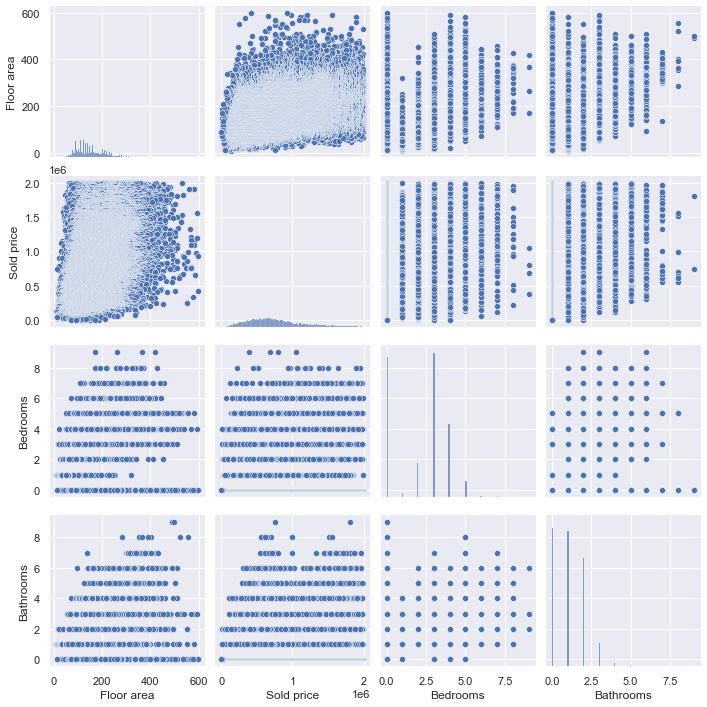

In [937]:
sns.set()
cols = ['Floor area', 'Sold price', 'Bedrooms', 'Bathrooms']
sns.pairplot(df_train[cols], size = 2.5)
plt.show();

In [938]:
df_train.columns

Index(['Floor area', 'Sold price', 'Bedrooms', 'Bathrooms',
       'Region Name_Auckland Region', 'Region Name_Bay of Plenty Region',
       'Region Name_Canterbury Region', 'Region Name_Gisborne Region',
       'Region Name_Hawke's Bay Region',
       'Region Name_ManawatuWhanganui Region', 'Region Name_Northland Region',
       'Region Name_Otago Region', 'Region Name_Southland Region',
       'Region Name_Taranaki Region', 'Region Name_Tasman Nelson Marlborough',
       'Region Name_Waikato Region', 'Region Name_Wellington Region',
       'Region Name_West Coast Region',
       'Property  Minor description_Apartments',
       'Property  Minor description_Dwelling',
       'Property  Minor description_Home & income',
       'Property  Minor description_More than one dwelling',
       'Property  Minor description_Ownership home units'],
      dtype='object')

Train a linear regression model

In [939]:
X = df_train[['Bedrooms', 'Bathrooms', 
       'Region Name_Auckland Region', 'Region Name_Bay of Plenty Region',
       'Region Name_Canterbury Region', 'Region Name_Gisborne Region',
       "Region Name_Hawke's Bay Region",
       'Region Name_ManawatuWhanganui Region', 'Region Name_Northland Region',
       'Region Name_Otago Region', 'Region Name_Southland Region',
       'Region Name_Taranaki Region', 'Region Name_Tasman Nelson Marlborough',
       'Region Name_Waikato Region', 'Region Name_Wellington Region',
       'Region Name_West Coast Region',
       'Property  Minor description_Apartments',
       'Property  Minor description_Dwelling',
       'Property  Minor description_Home & income',
       'Property  Minor description_More than one dwelling',
       'Property  Minor description_Ownership home units']]

y = df_train['Sold price']

In [940]:
# X = df_train[['CL_Bedrooms', 'CL_Bathrooms', 
#        'Region_Auckland', 'Region_Large city', 'Region_Other']]

# y = df_train['CL_TransferPrice']

In [941]:
#Train test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [942]:
from sklearn import metrics
from sklearn.model_selection import cross_val_score

def cross_val(model):
    pred = cross_val_score(model, X, y, cv=10)
    return pred.mean()

def print_evaluate(true, predicted):  
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    print('MAE:', mae)
    print('MSE:', mse)
    print('RMSE:', rmse)
    print('R2 Square', r2_square)
    print('__________________________________')
    
def evaluate(true, predicted):
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    return mae, mse, rmse, r2_square

In [943]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [944]:
pipeline = Pipeline([
    ('std_scalar', StandardScaler())
])

X_train = pipeline.fit_transform(X_train)
X_test = pipeline.transform(X_test)

In [945]:
#Linear regression
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression(normalize=True)
lin_reg.fit(X_train,y_train)

c:\Python\Python37\lib\site-packages\sklearn\linear_model\_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  FutureWarning,


LinearRegression(normalize=True)

In [946]:
#Model evaluation
# print the intercept
print(lin_reg.intercept_)

775770.4751640898


In [947]:
coeff_df = pd.DataFrame(lin_reg.coef_, X.columns, columns=['Coefficient-Linear'])
coeff_df

Coefficient-Linear
Bedrooms                                                  3.580017e+04
Bathrooms                                                 9.542083e+04
Region Name_Auckland Region                               2.426068e+14
Region Name_Bay of Plenty Region                          1.366655e+14
Region Name_Canterbury Region                             2.024348e+14
Region Name_Gisborne Region                               4.650034e+13
Region Name_Hawke's Bay Region                            9.451245e+13
Region Name_ManawatuWhanganui Region                      1.298539e+14
Region Name_Northland Region                              9.850726e+13
Region Name_Otago Region                                  1.267757e+14
Region Name_Southland Region                              8.887139e+13
Region Name_Taranaki Region                               8.764306e+13
Region Name_Tasman Nelson Marlborough                     9.994865e+13
Region Name_Waikato Region                                1.689863e+14
Region Name_Wellington Region                             1.624276e+14
Region Name_West Coast Region                             5.567480e+13
Property  Minor description_Apartments                    1.938899e+15
Property  Minor description_Dwelling                      6.398922e+15
Property  Minor description_Home & income                 2.947706e+15
Property  Minor description_More than one dwelling        1.664269e+15
Property  Minor description_Ownership home units          5.274904e+15

In [771]:
# coeff_df.to_csv('coefficient.csv')

In [948]:
df_coeff = pd.DataFrame()

In [949]:
df_coeff = coeff_df

In [950]:
pred = lin_reg.predict(X_test)

In [951]:
import hvplot.pandas

In [952]:
pd.DataFrame({'True Values': y_test, 'Predicted Values': pred}).hvplot.scatter(x='True Values', y='Predicted Values')

:Scatter   [True Values]   (Predicted Values)

In [953]:
pd.DataFrame({'Error Values': (y_test - pred)}).hvplot.kde()

:Distribution   [Error Values]   (Density)

In [954]:
test_pred = lin_reg.predict(X_test)
train_pred = lin_reg.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

results_df = pd.DataFrame(data=[["Linear Regression", *evaluate(y_test, test_pred) , cross_val(LinearRegression())]], 
                          columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])

Test set evaluation:
_____________________________________
MAE: 218541.8299832707
MSE: 84964798720.87741
RMSE: 291487.218795057
R2 Square 0.46332889804445476
__________________________________
Train set evaluation:
_____________________________________
MAE: 219166.19109274854
MSE: 85256962346.79948
RMSE: 291987.948975295
R2 Square 0.4653481337000711
__________________________________


In [955]:
#Ridge
from sklearn.linear_model import Ridge

model = Ridge(alpha=100, solver='cholesky', tol=0.0001, random_state=42)
model.fit(X_train, y_train)
pred = model.predict(X_test)

test_pred = model.predict(X_test)
train_pred = model.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

results_df_2 = pd.DataFrame(data=[["Ridge Regression", *evaluate(y_test, test_pred) , cross_val(Ridge())]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])
results_df = results_df.append(results_df_2, ignore_index=True)

Test set evaluation:
_____________________________________
MAE: 218540.04800988786
MSE: 84963991936.73372
RMSE: 291485.8348817893
R2 Square 0.46333399401057185
__________________________________
Train set evaluation:
_____________________________________
MAE: 219164.67745537125
MSE: 85256864130.08688
RMSE: 291987.780789003
R2 Square 0.4653487496233606
__________________________________


In [956]:
model.intercept_

775770.597610227

In [957]:
ridge_coeff_df = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient-Ridge'])


In [958]:
ridge_coeff_df

Coefficient-Ridge
Bedrooms                                                 35998.969883
Bathrooms                                                95171.279457
Region Name_Auckland Region                             154650.934604
Region Name_Bay of Plenty Region                          3594.329302
Region Name_Canterbury Region                           -68571.214424
Region Name_Gisborne Region                             -16333.983447
Region Name_Hawke's Bay Region                           -9985.400475
Region Name_ManawatuWhanganui Region                    -56297.457108
Region Name_Northland Region                            -26262.488984
Region Name_Otago Region                                -20805.445009
Region Name_Southland Region                            -58258.015841
Region Name_Taranaki Region                             -38545.496344
Region Name_Tasman Nelson Marlborough                   -10476.884388
Region Name_Waikato Region                              -20323.325842
Region Name_Wellington Region                            35974.374927
Region Name_West Coast Region                           -48442.025720
Property  Minor description_Apartments                  -25803.136839
Property  Minor description_Dwelling                     18517.020985
Property  Minor description_Home & income                27223.865566
Property  Minor description_More than one dwelling        9042.511966
Property  Minor description_Ownership home units        -31044.440135

In [959]:
df_coeff = df_coeff.join(ridge_coeff_df,how='left')

In [960]:
df_coeff

Coefficient-Linear  \
Bedrooms                                                  3.580017e+04   
Bathrooms                                                 9.542083e+04   
Region Name_Auckland Region                               2.426068e+14   
Region Name_Bay of Plenty Region                          1.366655e+14   
Region Name_Canterbury Region                             2.024348e+14   
Region Name_Gisborne Region                               4.650034e+13   
Region Name_Hawke's Bay Region                            9.451245e+13   
Region Name_ManawatuWhanganui Region                      1.298539e+14   
Region Name_Northland Region                              9.850726e+13   
Region Name_Otago Region                                  1.267757e+14   
Region Name_Southland Region                              8.887139e+13   
Region Name_Taranaki Region                               8.764306e+13   
Region Name_Tasman Nelson Marlborough                     9.994865e+13   
Region Name_Waikato Region                                1.689863e+14   
Region Name_Wellington Region                             1.624276e+14   
Region Name_West Coast Region                             5.567480e+13   
Property  Minor description_Apartments                    1.938899e+15   
Property  Minor description_Dwelling                      6.398922e+15   
Property  Minor description_Home & income                 2.947706e+15   
Property  Minor description_More than one dwelling        1.664269e+15   
Property  Minor description_Ownership home units          5.274904e+15   

                                                    Coefficient-Ridge  
Bedrooms                                                 35998.969883  
Bathrooms                                                95171.279457  
Region Name_Auckland Region                             154650.934604  
Region Name_Bay of Plenty Region                          3594.329302  
Region Name_Canterbury Region                           -68571.214424  
Region Name_Gisborne Region                             -16333.983447  
Region Name_Hawke's Bay Region                           -9985.400475  
Region Name_ManawatuWhanganui Region                    -56297.457108  
Region Name_Northland Region                            -26262.488984  
Region Name_Otago Region                                -20805.445009  
Region Name_Southland Region                            -58258.015841  
Region Name_Taranaki Region                             -38545.496344  
Region Name_Tasman Nelson Marlborough                   -10476.884388  
Region Name_Waikato Region                              -20323.325842  
Region Name_Wellington Region                            35974.374927  
Region Name_West Coast Region                           -48442.025720  
Property  Minor description_Apartments                  -25803.136839  
Property  Minor description_Dwelling                     18517.020985  
Property  Minor description_Home & income                27223.865566  
Property  Minor description_More than one dwelling        9042.511966  
Property  Minor description_Ownership home units        -31044.440135

In [961]:
#Lasso regression
from sklearn.linear_model import Lasso

model = Lasso(alpha=0.1, 
              precompute=True, 
#               warm_start=True, 
              positive=True, 
              selection='random',
              random_state=42)
model.fit(X_train, y_train)

test_pred = model.predict(X_test)
train_pred = model.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

results_df_2 = pd.DataFrame(data=[["Lasso Regression", *evaluate(y_test, test_pred) , cross_val(Lasso())]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])
results_df = results_df.append(results_df_2, ignore_index=True)

c:\Python\Python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 85572071873422.0, tolerance: 2005815922793.1125
  positive,


Test set evaluation:
_____________________________________
MAE: 218538.5017016726
MSE: 84964503760.67325
RMSE: 291486.71283726336
R2 Square 0.4633307611291696
__________________________________
Train set evaluation:
_____________________________________
MAE: 219163.36436378694
MSE: 85256832438.73909
RMSE: 291987.7265207205
R2 Square 0.4653489483618304
__________________________________


c:\Python\Python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.331e+15, tolerance: 2.142e+12
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
c:\Python\Python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.176e+13, tolerance: 2.560e+12
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
c:\Python\Python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. 

In [963]:
model.intercept_

775770.597610227

In [964]:
Lasso_coeff_df = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient-Lasso'])


In [965]:
Lasso_coeff_df

Coefficient-Lasso
Bedrooms                                                 35912.265348
Bathrooms                                                95298.133384
Region Name_Auckland Region                             365981.464810
Region Name_Bay of Plenty Region                        122590.091743
Region Name_Canterbury Region                           107642.217594
Region Name_Gisborne Region                              24141.766597
Region Name_Hawke's Bay Region                           72298.995371
Region Name_ManawatuWhanganui Region                     56727.637291
Region Name_Northland Region                             59486.756790
Region Name_Otago Region                                 89561.904735
Region Name_Southland Region                             19079.665957
Region Name_Taranaki Region                              37735.996428
Region Name_Tasman Nelson Marlborough                    76538.517742
Region Name_Waikato Region                              126796.251264
Region Name_Wellington Region                           177428.287579
Region Name_West Coast Region                                0.000000
Property  Minor description_Apartments                       0.000000
Property  Minor description_Dwelling                    103806.288245
Property  Minor description_Home & income                66512.564685
Property  Minor description_More than one dwelling       31225.677144
Property  Minor description_Ownership home units         39194.725723

In [966]:
df_coeff = df_coeff.join(Lasso_coeff_df,how='left')

In [967]:
#Elastic net
from sklearn.linear_model import ElasticNet

model = ElasticNet(alpha=0.1, l1_ratio=0.9, selection='random', random_state=42)
model.fit(X_train, y_train)

test_pred = model.predict(X_test)
train_pred = model.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

results_df_2 = pd.DataFrame(data=[["Elastic Net Regression", *evaluate(y_test, test_pred) , cross_val(ElasticNet())]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])
results_df = results_df.append(results_df_2, ignore_index=True)

c:\Python\Python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.624e+14, tolerance: 2.006e+12
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


Test set evaluation:
_____________________________________
MAE: 218564.01658726795
MSE: 84962594097.58754
RMSE: 291483.4370896356
R2 Square 0.46334282331266197
__________________________________
Train set evaluation:
_____________________________________
MAE: 219184.97324997353
MSE: 85261721952.94077
RMSE: 291996.09920843254
R2 Square 0.46531828590540136
__________________________________


In [968]:
model.intercept_

775770.597610227

In [969]:
EN_coeff_df = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient-EN'])

In [970]:
EN_coeff_df

Coefficient-EN
Bedrooms                                              36933.167067
Bathrooms                                             93773.683068
Region Name_Auckland Region                          153532.133915
Region Name_Bay of Plenty Region                       3553.681708
Region Name_Canterbury Region                        -68077.007486
Region Name_Gisborne Region                          -16204.584970
Region Name_Hawke's Bay Region                        -9916.801647
Region Name_ManawatuWhanganui Region                 -55877.945781
Region Name_Northland Region                         -26040.566575
Region Name_Otago Region                             -20643.899786
Region Name_Southland Region                         -57785.187853
Region Name_Taranaki Region                          -38226.206074
Region Name_Tasman Nelson Marlborough                -10383.968478
Region Name_Waikato Region                           -20163.722025
Region Name_Wellington Region                         35619.109836
Region Name_West Coast Region                        -48025.972469
Property  Minor description_Apartments               -25454.047908
Property  Minor description_Dwelling                  18135.405595
Property  Minor description_Home & income             27046.808024
Property  Minor description_More than one dwelling     8933.572838
Property  Minor description_Ownership home units     -30581.362457

In [789]:
#Polynomial Regression
from sklearn.preprocessing import PolynomialFeatures

poly_reg = PolynomialFeatures(degree=2)

X_train_2_d = poly_reg.fit_transform(X_train)
X_test_2_d = poly_reg.transform(X_test)

lin_reg = LinearRegression(normalize=True)
lin_reg.fit(X_train_2_d,y_train)

test_pred = lin_reg.predict(X_test_2_d)
train_pred = lin_reg.predict(X_train_2_d)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

results_df_2 = pd.DataFrame(data=[["Polynomail Regression", *evaluate(y_test, test_pred), 0]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', 'Cross Validation'])
results_df = results_df.append(results_df_2, ignore_index=True)

c:\Python\Python37\lib\site-packages\sklearn\linear_model\_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  FutureWarning,


Test set evaluation:
_____________________________________
MAE: 672570587677366.6
MSE: 2.438580057805913e+34
RMSE: 1.561595356616404e+17
R2 Square -1.5403031214478016e+23
__________________________________
Train set evaluation:
_____________________________________
MAE: 210109.37047843164
MSE: 80102957960.63882
RMSE: 283024.65963346517
R2 Square 0.4976692250001561
__________________________________


In [971]:
df_coeff = df_coeff.join(EN_coeff_df,how='left')

In [972]:
#Stochastic Gradient Descent
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(n_iter_no_change=250, penalty=None, eta0=0.0001, max_iter=100000)
sgd_reg.fit(X_train, y_train)

test_pred = sgd_reg.predict(X_test)
train_pred = sgd_reg.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

results_df_2 = pd.DataFrame(data=[["Stochastic Gradient Descent", *evaluate(y_test, test_pred), 0]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', 'Cross Validation'])
results_df = results_df.append(results_df_2, ignore_index=True)

Test set evaluation:
_____________________________________
MAE: 218538.65213388804
MSE: 84964653200.96765
RMSE: 291486.96917867125
R2 Square 0.4633298172054662
__________________________________
Train set evaluation:
_____________________________________
MAE: 219163.25997637506
MSE: 85256832820.50235
RMSE: 291987.7271744522
R2 Square 0.46534894596776866
__________________________________


In [973]:
sgd_reg.intercept_

array([775773.25333305])

In [974]:
sgd_coeff_df = pd.DataFrame(sgd_reg.coef_, X.columns, columns=['Coefficient-SGD'])

In [975]:
sgd_coeff_df

Coefficient-SGD
Bedrooms                                               35918.959410
Bathrooms                                              95305.210613
Region Name_Auckland Region                           154753.756968
Region Name_Bay of Plenty Region                        3599.523399
Region Name_Canterbury Region                         -68616.533426
Region Name_Gisborne Region                           -16341.451821
Region Name_Hawke's Bay Region                         -9986.667912
Region Name_ManawatuWhanganui Region                  -56331.636051
Region Name_Northland Region                          -26284.232840
Region Name_Otago Region                              -20820.227208
Region Name_Southland Region                          -58297.932626
Region Name_Taranaki Region                           -38577.214951
Region Name_Tasman Nelson Marlborough                 -10486.929912
Region Name_Waikato Region                            -20339.623897
Region Name_Wellington Region                          36002.099737
Region Name_West Coast Region                         -48477.545224
Property  Minor description_Apartments                -25832.376071
Property  Minor description_Dwelling                   18547.646490
Property  Minor description_Home & income              27239.633358
Property  Minor description_More than one dwelling      9054.812343
Property  Minor description_Ownership home units      -31083.536255

In [976]:
df_coeff = df_coeff.join(sgd_coeff_df,how='left')

In [977]:
pd.DataFrame({'True Values': y_test, 'Predicted Values': pred}).hvplot.scatter(x='True Values', y='Predicted Values')

:Scatter   [True Values]   (Predicted Values)

In [795]:
#Random Forest Regressor
# from sklearn.ensemble import RandomForestRegressor

# rf_reg = RandomForestRegressor(n_estimators=1000)
# rf_reg.fit(X_train, y_train)

# test_pred = rf_reg.predict(X_test)
# train_pred = rf_reg.predict(X_train)

# print('Test set evaluation:\n_____________________________________')
# print_evaluate(y_test, test_pred)

# print('Train set evaluation:\n_____________________________________')
# print_evaluate(y_train, train_pred)

# results_df_2 = pd.DataFrame(data=[["Random Forest Regressor", *evaluate(y_test, test_pred), 0]], 
#                             columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', 'Cross Validation'])
# results_df = results_df.append(results_df_2, ignore_index=True)

In [796]:
# rf_coeff_df = pd.DataFrame(rf_reg.feature_importances_, X.columns, columns=['Coefficient'])

In [797]:
# rf_coeff_df

In [798]:
#Support Vector Machine
# from sklearn.svm import SVR

# svm_reg = SVR(kernel='rbf', C=1000000, epsilon=0.001)
# svm_reg.fit(X_train, y_train)

# test_pred = svm_reg.predict(X_test)
# train_pred = svm_reg.predict(X_train)

# print('Test set evaluation:\n_____________________________________')
# print_evaluate(y_test, test_pred)

# print('Train set evaluation:\n_____________________________________')
# print_evaluate(y_train, train_pred)

# results_df_2 = pd.DataFrame(data=[["SVM Regressor", *evaluate(y_test, test_pred), 0]], 
#                             columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', 'Cross Validation'])
# results_df = results_df.append(results_df_2, ignore_index=True)

In [799]:
results_df

Model           MAE           MSE          RMSE  \
0            Linear Regression  2.185418e+05  8.496480e+10  2.914872e+05   
1             Ridge Regression  2.185400e+05  8.496399e+10  2.914858e+05   
2             Lasso Regression  2.185385e+05  8.496450e+10  2.914867e+05   
3       Elastic Net Regression  2.185640e+05  8.496259e+10  2.914834e+05   
4        Polynomail Regression  6.725706e+14  2.438580e+34  1.561595e+17   
5  Stochastic Gradient Descent  2.185377e+05  8.496450e+10  2.914867e+05   

      R2 Square  Cross Validation  
0  4.633289e-01         -1.735134  
1  4.633340e-01         -1.732673  
2  4.633308e-01         -1.732707  
3  4.633428e-01         -2.667975  
4 -1.540303e+23          0.000000  
5  4.633308e-01          0.000000

In [800]:
results_df.columns

Index(['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', 'Cross Validation'], dtype='object')

In [801]:
results_df = results_df.loc[results_df['Model'] != 'Polynomail Regression']

In [802]:
results_df

Model            MAE           MSE           RMSE  \
0            Linear Regression  218541.829983  8.496480e+10  291487.218795   
1             Ridge Regression  218540.048010  8.496399e+10  291485.834882   
2             Lasso Regression  218538.501702  8.496450e+10  291486.712837   
3       Elastic Net Regression  218564.016587  8.496259e+10  291483.437090   
5  Stochastic Gradient Descent  218537.706517  8.496450e+10  291486.700598   

   R2 Square  Cross Validation  
0   0.463329         -1.735134  
1   0.463334         -1.732673  
2   0.463331         -1.732707  
3   0.463343         -2.667975  
5   0.463331          0.000000

<AxesSubplot:ylabel='Model'>

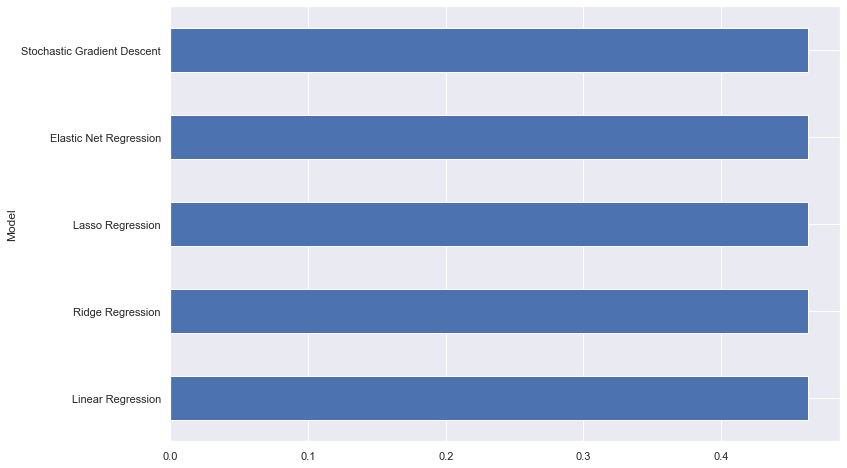

In [803]:
results_df.set_index('Model', inplace=True)
results_df['R2 Square'].plot(kind='barh', figsize=(12, 8))

<AxesSubplot:ylabel='Model'>

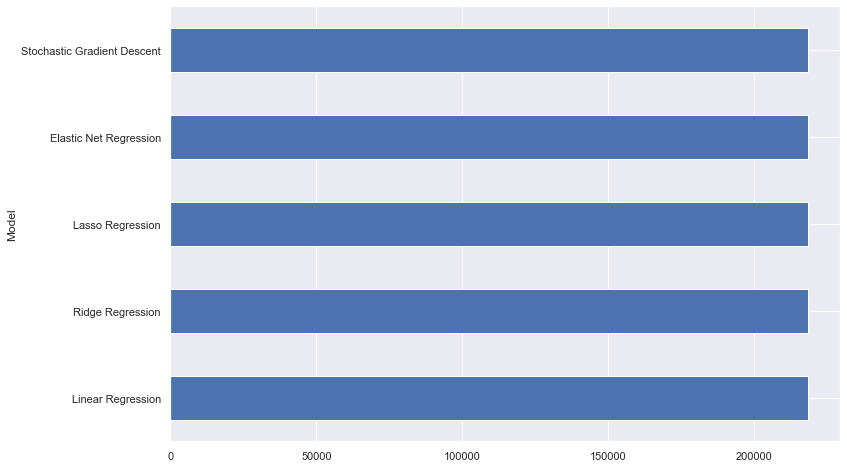

In [804]:
results_df['MAE'].plot(kind='barh', figsize=(12, 8))

<AxesSubplot:ylabel='Model'>

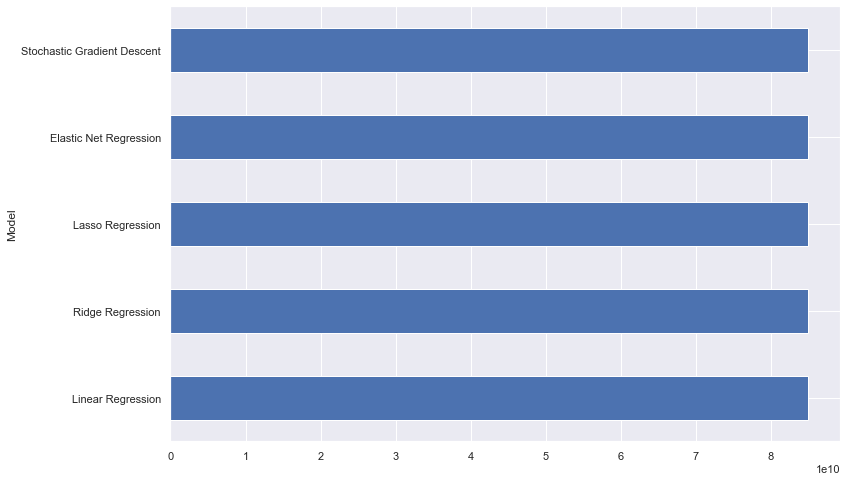

In [805]:
results_df['MSE'].plot(kind='barh', figsize=(12, 8))

<AxesSubplot:ylabel='Model'>

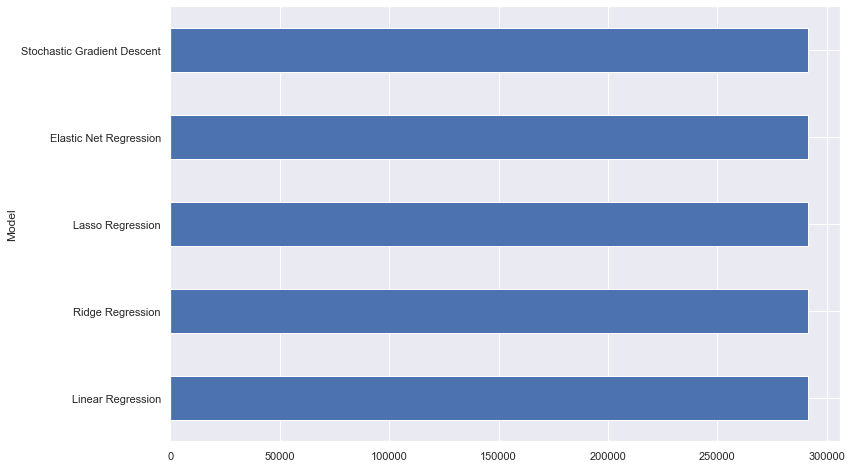

In [806]:
results_df['RMSE'].plot(kind='barh', figsize=(12, 8))

In [978]:
df_coeff

Coefficient-Linear  \
Bedrooms                                                  3.580017e+04   
Bathrooms                                                 9.542083e+04   
Region Name_Auckland Region                               2.426068e+14   
Region Name_Bay of Plenty Region                          1.366655e+14   
Region Name_Canterbury Region                             2.024348e+14   
Region Name_Gisborne Region                               4.650034e+13   
Region Name_Hawke's Bay Region                            9.451245e+13   
Region Name_ManawatuWhanganui Region                      1.298539e+14   
Region Name_Northland Region                              9.850726e+13   
Region Name_Otago Region                                  1.267757e+14   
Region Name_Southland Region                              8.887139e+13   
Region Name_Taranaki Region                               8.764306e+13   
Region Name_Tasman Nelson Marlborough                     9.994865e+13   
Region Name_Waikato Region                                1.689863e+14   
Region Name_Wellington Region                             1.624276e+14   
Region Name_West Coast Region                             5.567480e+13   
Property  Minor description_Apartments                    1.938899e+15   
Property  Minor description_Dwelling                      6.398922e+15   
Property  Minor description_Home & income                 2.947706e+15   
Property  Minor description_More than one dwelling        1.664269e+15   
Property  Minor description_Ownership home units          5.274904e+15   

                                                    Coefficient-Ridge  \
Bedrooms                                                 35998.969883   
Bathrooms                                                95171.279457   
Region Name_Auckland Region                             154650.934604   
Region Name_Bay of Plenty Region                          3594.329302   
Region Name_Canterbury Region                           -68571.214424   
Region Name_Gisborne Region                             -16333.983447   
Region Name_Hawke's Bay Region                           -9985.400475   
Region Name_ManawatuWhanganui Region                    -56297.457108   
Region Name_Northland Region                            -26262.488984   
Region Name_Otago Region                                -20805.445009   
Region Name_Southland Region                            -58258.015841   
Region Name_Taranaki Region                             -38545.496344   
Region Name_Tasman Nelson Marlborough                   -10476.884388   
Region Name_Waikato Region                              -20323.325842   
Region Name_Wellington Region                            35974.374927   
Region Name_West Coast Region                           -48442.025720   
Property  Minor description_Apartments                  -25803.136839   
Property  Minor description_Dwelling                     18517.020985   
Property  Minor description_Home & income                27223.865566   
Property  Minor description_More than one dwelling        9042.511966   
Property  Minor description_Ownership home units        -31044.440135   

                                                    Coefficient-Lasso  \
Bedrooms                                                 35912.265348   
Bathrooms                                                95298.133384   
Region Name_Auckland Region                             365981.464810   
Region Name_Bay of Plenty Region                        122590.091743   
Region Name_Canterbury Region                           107642.217594   
Region Name_Gisborne Region                              24141.766597   
Region Name_Hawke's Bay Region                           72298.995371   
Region Name_ManawatuWhanganui Region                     56727.637291   
Region Name_Northland Region                             59486.756790   
Region Name_Otago Region                                 89561.904735   
Region Name_S

In [980]:
df_coeff.to_csv('Coefficient_table.csv')